      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

===== MULTIPLE LINEAR REGRESSION =====
MAE: 5.018980827

/tmp/ipython-input-2487079396.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].mean(), inplace=True)


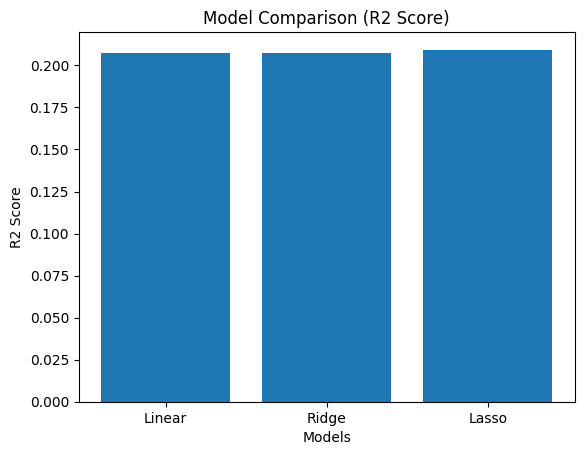


Feature Coefficients:
             Feature    Linear     Ridge     Lasso
0             gender -0.125071 -0.125060 -0.037853
1                age  0.861118  0.861137  0.783664
2       hypertension  0.655364  0.655251  0.575227
3      heart_disease -0.291823 -0.291705 -0.165767
4       ever_married  1.125486  1.125313  1.109927
5          work_type -1.290719 -1.290476 -1.245252
6     Residence_type -0.163423 -0.163379 -0.062016
7  avg_glucose_level  0.769137  0.768978  0.671044
8     smoking_status  0.680314  0.680272  0.627318
9             stroke -0.200867 -0.200781 -0.075224


In [ ]:
# ==========================================
# STEP 1: Import Libraries
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# ==========================================
# STEP 2: Load Dataset
# ==========================================

df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
print(df.head())


# ==========================================
# STEP 3: Data Cleaning
# ==========================================

# Drop unnecessary column
df.drop("id", axis=1, inplace=True)

# Fill missing BMI
df["bmi"].fillna(df["bmi"].mean(), inplace=True)


# ==========================================
# STEP 4: Encode Categorical Data
# ==========================================

le = LabelEncoder()

cat_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# ==========================================
# STEP 5: Feature & Target Selection
# ==========================================

X = df.drop("bmi", axis=1)   # features
y = df["bmi"]                # target


# ==========================================
# STEP 6: Train-Test Split
# ==========================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ==========================================
# STEP 7: Feature Scaling (IMPORTANT)
# ==========================================

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ==========================================
# STEP 8: MULTIPLE LINEAR REGRESSION
# ==========================================

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("\n===== MULTIPLE LINEAR REGRESSION =====")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


# ==========================================
# STEP 9: RIDGE REGRESSION
# ==========================================

ridge = Ridge(alpha=1.0)   # alpha = regularization strength
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("\n===== RIDGE REGRESSION =====")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R2 Score:", r2_score(y_test, y_pred_ridge))


# ==========================================
# STEP 10: LASSO REGRESSION
# ==========================================

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("\n===== LASSO REGRESSION =====")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R2 Score:", r2_score(y_test, y_pred_lasso))


# ==========================================
# STEP 11: MODEL COMPARISON
# ==========================================

models = ["Linear", "Ridge", "Lasso"]
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso)
]

plt.bar(models, r2_scores)
plt.title("Model Comparison (R2 Score)")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.show()


# ==========================================
# STEP 12: COEFFICIENT COMPARISON
# ==========================================

print("\nFeature Coefficients:")

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

print(coeff_df)
